In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
shap_accuracy_drop={"IE": 0.8, "NS": 0.96, "TF": 0.79, "JP": 0.75}
lime_accuracy_drop={"IE": 0.77, "NS": 0.87, "TF": 0.58, "JP": 0.84}
shap_accuracy_increase={"IE": 0.41, "NS": 0.42, "TF": 0.36, "JP": 0.28}
lime_accuracy_increase={"IE": 0.4,"NS": 0.5,"TF": 0.5,"JP": 0.44}

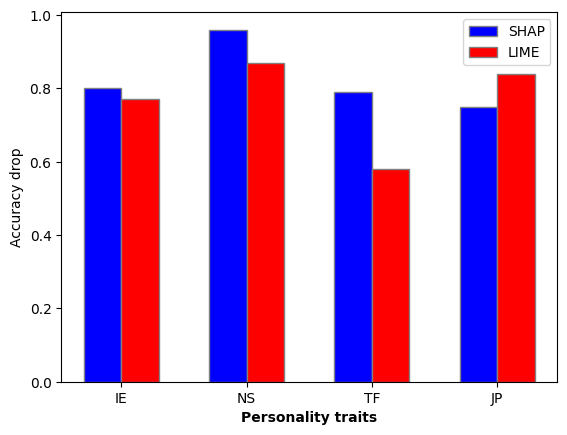

In [3]:
# plot the accuracy drop
fig, ax = plt.subplots()
barWidth = 0.3
r1 = np.arange(len(shap_accuracy_drop))
r2 = [x + barWidth for x in r1]
plt.bar(r1, shap_accuracy_drop.values(), color='b', width=barWidth, edgecolor='grey', label='SHAP')
plt.bar(r2, lime_accuracy_drop.values(), color='r', width=barWidth, edgecolor='grey', label='LIME')
plt.xlabel('Personality traits', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(shap_accuracy_drop))], shap_accuracy_drop.keys())
plt.ylabel('Accuracy drop')
plt.legend()
plt.show()

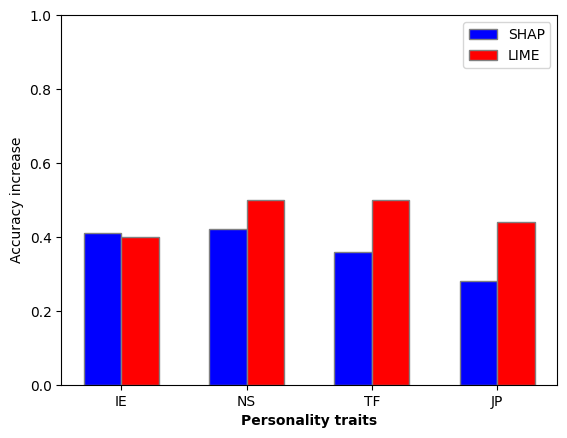

In [4]:
# plot the accuracy increase as a bar chart
fig, ax = plt.subplots()
barWidth = 0.3
r1 = np.arange(len(shap_accuracy_increase))
r2 = [x + barWidth for x in r1]
plt.bar(r1, shap_accuracy_increase.values(), color='b', width=barWidth, edgecolor='grey', label='SHAP')
plt.bar(r2, lime_accuracy_increase.values(), color='r', width=barWidth, edgecolor='grey', label='LIME')
plt.xlabel('Personality traits', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(shap_accuracy_increase))], shap_accuracy_increase.keys())
# set max value for y-axis
max_value = 1
plt.ylim(0, max_value)
plt.ylabel('Accuracy increase')
plt.legend()
plt.show()



### Load Accuracy scores

In [41]:
import json

In [42]:
# load shap pos accuracy scores
with open('shap pos faithfulness/accuracy drop 100.json') as json_file:
    shap_accuracy_drop_100 = json.load(json_file)

with open('shap pos faithfulness/accuracy drop 150.json') as json_file:
    shap_accuracy_drop_150 = json.load(json_file)    

with open('shap pos faithfulness/accuracy drop 150.json') as json_file:
    shap_accuracy_drop_200 = json.load(json_file)

with open('shap pos faithfulness/accuracy drop 250.json') as json_file:
    shap_accuracy_drop_250 = json.load(json_file)

In [43]:
# load lime pos accuracy scores
with open('lime pos faithfulness/accuracy drop 100.json') as json_file:
    lime_accuracy_drop_100 = json.load(json_file)

with open('lime pos faithfulness/accuracy drop 150.json') as json_file:
    lime_accuracy_drop_150 = json.load(json_file)

with open('lime pos faithfulness/accuracy drop 200.json') as json_file:
    lime_accuracy_drop_200 = json.load(json_file)

with open('lime pos faithfulness/accuracy drop 250.json') as json_file:
    lime_accuracy_drop_250 = json.load(json_file)

In [44]:
# load shap neg accuracy scores

with open('shap neg faithfulness/accuracy_scores_100.json') as json_file:
    shap_accuracy_increase_100 = json.load(json_file)
    shap_accuracy_increase_100={key: value[key] for key, value in shap_accuracy_increase_100.items()}

with open('shap neg faithfulness/accuracy_scores_150.json') as json_file:
    shap_accuracy_increase_150 = json.load(json_file)
    shap_accuracy_increase_150={key: value[key] for key, value in shap_accuracy_increase_150.items()}

with open('shap neg faithfulness/accuracy_scores_200.json') as json_file:
    shap_accuracy_increase_200 = json.load(json_file)
    shap_accuracy_increase_200={key: value[key] for key, value in shap_accuracy_increase_200.items()}

with open('shap neg faithfulness/accuracy_scores_250.json') as json_file:
    shap_accuracy_increase_250 = json.load(json_file)
    shap_accuracy_increase_250={key: value[key] for key, value in shap_accuracy_increase_250.items()}

In [45]:
# load lime neg accuracy scores
with open('lime neg faithfulness/accuracy_scores_100.json') as json_file:
    lime_accuracy_increase_100 = json.load(json_file)
    lime_accuracy_increase_100={key: value[key] for key, value in lime_accuracy_increase_100.items()}

with open('lime neg faithfulness/accuracy_scores_150.json') as json_file:
    lime_accuracy_increase_150 = json.load(json_file)
    lime_accuracy_increase_150={key: value[key] for key, value in lime_accuracy_increase_150.items()}

with open('lime neg faithfulness/accuracy_scores_200.json') as json_file:
    lime_accuracy_increase_200 = json.load(json_file)
    lime_accuracy_increase_200={key: value[key] for key, value in lime_accuracy_increase_200.items()}

with open('lime neg faithfulness/accuracy_scores_250.json') as json_file:
    lime_accuracy_increase_250 = json.load(json_file)
    lime_accuracy_increase_250={key: value[key] for key, value in lime_accuracy_increase_250.items()}

### Plot the accuracy for each explainer

In [50]:
# plotting accuracy increase
def plot_aspect_over_time(data1, data2, aspect, start=1):
    # Extract time points and aspect values for both datasets
    time_points = sorted(data1.keys())
    aspect_values1 = [data1[time][aspect] for time in time_points]
    aspect_values2 = [data2[time][aspect] for time in time_points]

    # Plotting
    plt.figure(figsize=(8, 5))
    # Plot the first line
    plt.plot([0] + time_points, [start] + aspect_values1, label='SHAP', marker='o')

    # Plot the second line
    plt.plot([0] + time_points, [start] + aspect_values2, label='LIME', marker='s')

    plt.title(f'{aspect} Explainers')
    plt.xlabel('Features removed per instance')
    plt.ylabel(f'Accuracy values for {aspect} aspect')
    plt.grid(True)
    plt.legend()  # Show legend for distinguishing between the lines

    # Set x-axis limits
    plt.xlim(0, 260)
    plt.ylim(0, 1)
    plt.xticks([0, 100, 150, 200, 250])
    plt.show()

In [51]:
# build the shap accuracies dictionary
shap_accuracies = {
    100: shap_accuracy_increase_100,
    150: shap_accuracy_increase_150,
    200: shap_accuracy_increase_200,
    250: shap_accuracy_increase_250
}

lime_accuracies_inc = {
    100: lime_accuracy_increase_100,
    150: lime_accuracy_increase_150,
    200: lime_accuracy_increase_200,
    250: lime_accuracy_increase_250
}


shap_accuracies_drop = {
    100: shap_accuracy_drop_100,
    150: shap_accuracy_drop_150,
    200: shap_accuracy_drop_200,
    250: shap_accuracy_drop_250
}

lime_accuracies_drop = {
    100: lime_accuracy_drop_100,
    150: lime_accuracy_drop_150,
    200: lime_accuracy_drop_200,
    250: lime_accuracy_drop_250
}

#### Plot accuracy drops for each explainer

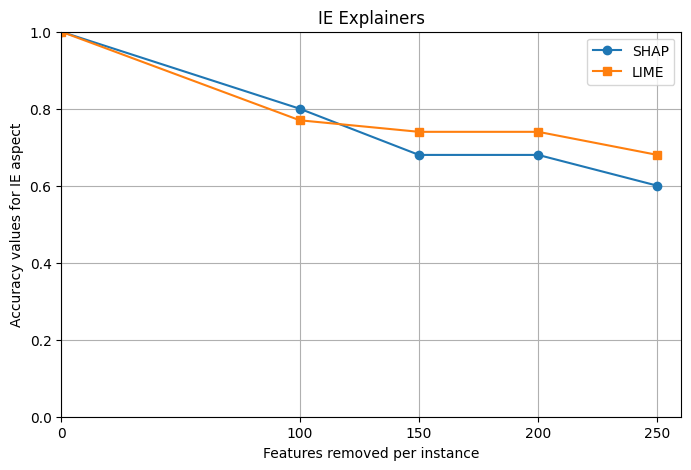

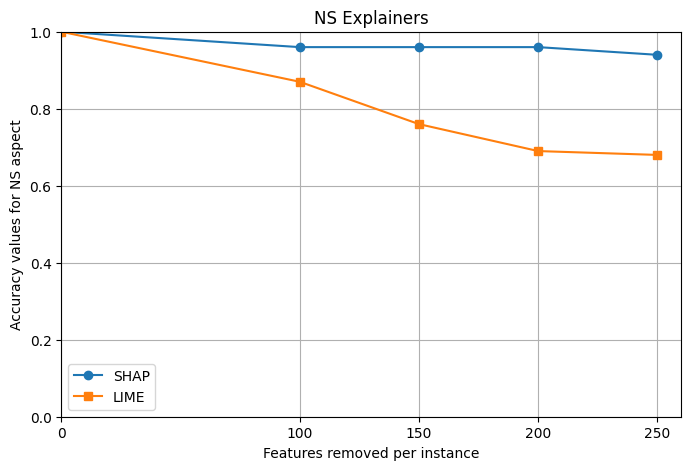

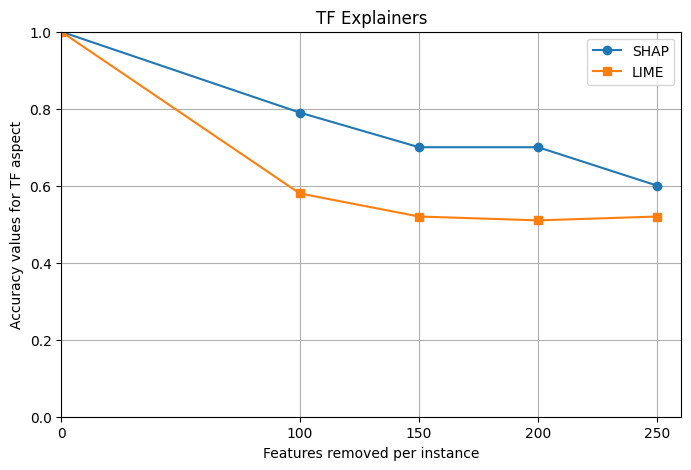

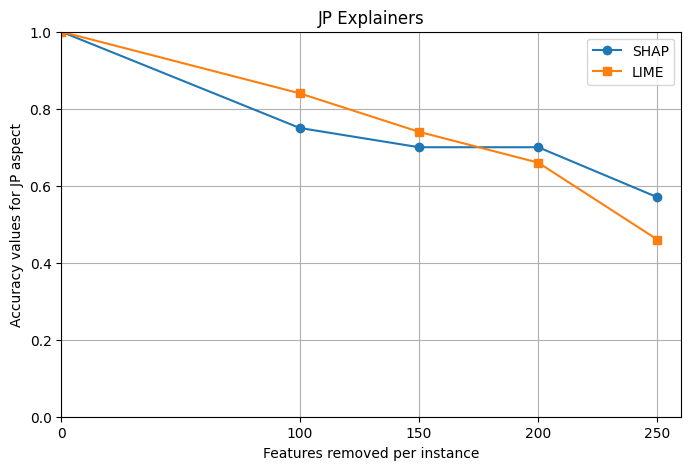

In [52]:
plot_aspect_over_time(shap_accuracies_drop, lime_accuracies_drop, 'IE')
plot_aspect_over_time(shap_accuracies_drop, lime_accuracies_drop, 'NS')
plot_aspect_over_time(shap_accuracies_drop, lime_accuracies_drop, 'TF')
plot_aspect_over_time(shap_accuracies_drop, lime_accuracies_drop, 'JP')

#### plot the accuracy increase for each explainer

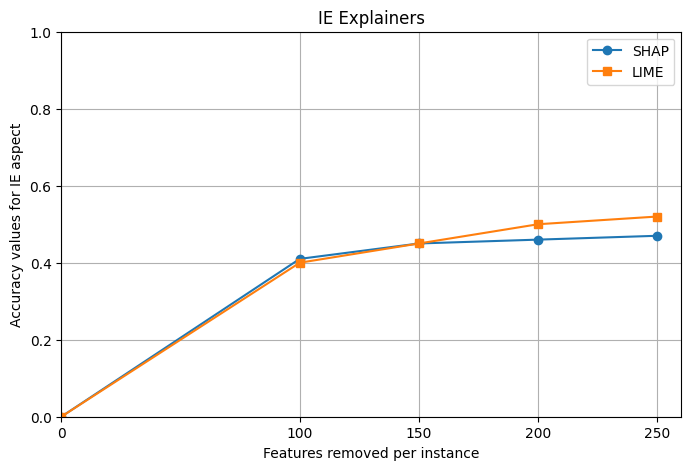

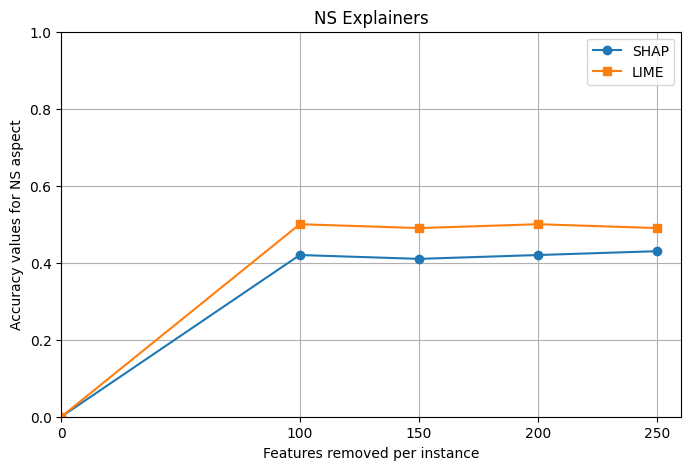

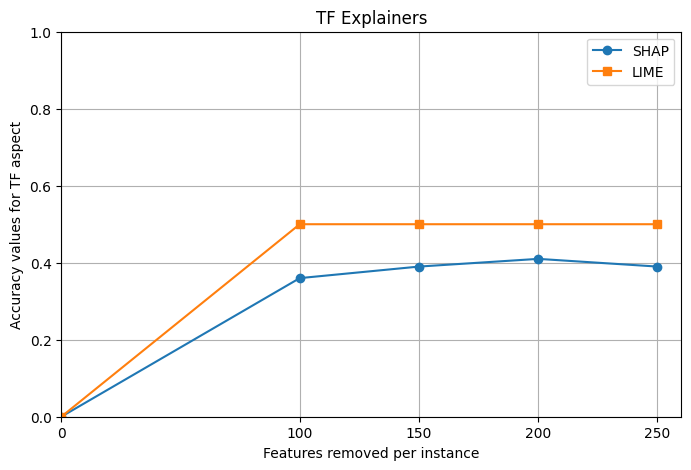

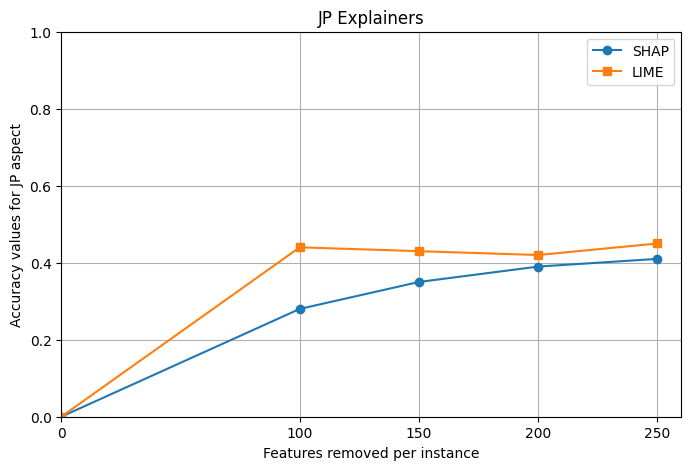

In [53]:
plot_aspect_over_time(shap_accuracies, lime_accuracies_inc, 'IE',start=0)
plot_aspect_over_time(shap_accuracies, lime_accuracies_inc, 'NS',start=0)
plot_aspect_over_time(shap_accuracies, lime_accuracies_inc, 'TF',start=0)
plot_aspect_over_time(shap_accuracies, lime_accuracies_inc, 'JP',start=0)